In [46]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [47]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [48]:
NUM_CLASSES = 5

# 学習データ読み込み

In [49]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [50]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [53]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 20)                860       
                                                                 
 dropout_5 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [55]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [56]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/30 [>.............................] - ETA: 17s - loss: 1.7398 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 1s 5ms/step - loss: 1.6489 - accuracy: 0.2286 - val_loss: 1.5117 - val_accuracy: 0.3907
Epoch 2/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.5028 - accuracy: 0.3203
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.4955 - accuracy: 0.3204 - val_loss: 1.4032 - val_accuracy: 0.4083
Epoch 3/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.4603 - accuracy: 0.3516
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.3990 - accuracy: 0.3733 - val_loss: 1.3146 - val_accuracy: 0.4259
Epoch 4/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3217 - accuracy: 0.3672

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.3286 - accuracy: 0.4043 - val_loss: 1.2368 - val_accuracy: 0.4700
Epoch 5/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.3330 - accuracy: 0.4141
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.2825 - accuracy: 0.4131 - val_loss: 1.1692 - val_accuracy: 0.4844
Epoch 6/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.2277 - accuracy: 0.4219
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [==============================] - 0s 2ms/step - loss: 1.2295 - accuracy: 0.4441 - val_loss: 1.1037 - val_accuracy: 0.5596
Epoch 7/1000
 1/30 [>.............................] - ETA: 0s - loss: 1.1410 - accuracy: 0.4844
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
30/30 [=============

In [57]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 910us/step - loss: 0.2325 - accuracy: 0.9576


In [58]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [59]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 50ms/step
[9.8103034e-01 1.7872075e-02 1.0572694e-03 3.7824251e-05 2.4642056e-06]
0


# 混同行列

40/40 [==============================] - 0s 613us/step


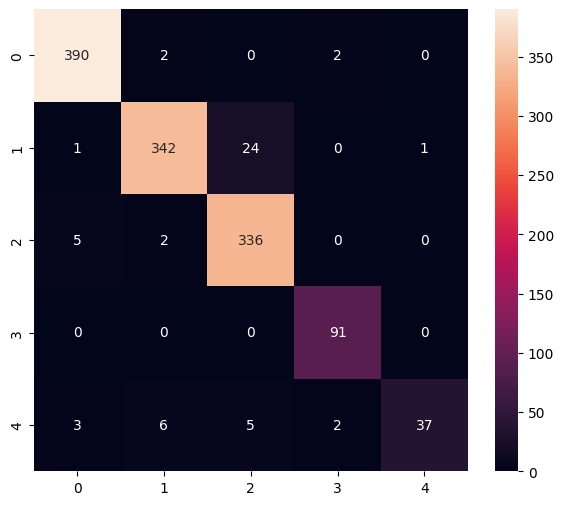

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       394
           1       0.97      0.93      0.95       368
           2       0.92      0.98      0.95       343
           3       0.96      1.00      0.98        91
           4       0.97      0.70      0.81        53

    accuracy                           0.96      1249
   macro avg       0.96      0.92      0.93      1249
weighted avg       0.96      0.96      0.96      1249



In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [61]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

c:\Users\Ck\OneDrive\UPD Docs\III - Electronics Engineering\Academic Units\2nd Semester\CoE 197Z\ME4\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpca34kt4u\assets


INFO:tensorflow:Assets written to: C:\Users\Ck\AppData\Local\Temp\tmpca34kt4u\assets


6616

# 推論テスト

In [63]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [64]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [65]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [66]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [67]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.8103034e-01 1.7872065e-02 1.0572682e-03 3.7824211e-05 2.4642009e-06]
0
